In [25]:
!wget --no-check-certificate https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2 -O ./idwiki-latest-pages-articles.xml.bz2

--2021-09-25 12:41:13--  https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 708987298 (676M) [application/octet-stream]
Saving to: ‘./idwiki-latest-pages-articles.xml.bz2’

./idwiki-latest-pag 100%[===================>] 676.14M  4.66MB/s    in 2m 25s  

2021-09-25 12:43:38 (4.68 MB/s) - ‘./idwiki-latest-pages-articles.xml.bz2’ saved [708987298/708987298]



In [1]:
!wget --no-check-certificate https://raw.githubusercontent.com/taufiqhusada/NLP_Class_Works/main/data_worthcheck/test.csv?token=ALOWBURT7X74SJ3IWYGH6RDBLA4IY -O ./test.csv
!wget --no-check-certificate https://raw.githubusercontent.com/taufiqhusada/NLP_Class_Works/main/data_worthcheck/train.csv?token=ALOWBUX542L7IOALRNKR42LBLBUJA -O ./train.csv
!wget --no-check-certificate https://raw.githubusercontent.com/taufiqhusada/NLP_Class_Works/main/data_worthcheck/dev.csv?token=ALOWBUWGBX44TGQAO34UEBTBLBUIS -O ./dev.csv

--2021-09-26 00:48:34--  https://raw.githubusercontent.com/taufiqhusada/NLP_Class_Works/main/data_worthcheck/test.csv?token=ALOWBURT7X74SJ3IWYGH6RDBLA4IY
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273939 (268K) [text/plain]
Saving to: ‘./test.csv’

./test.csv          100%[===================>] 267.52K  --.-KB/s    in 0.04s   

2021-09-26 00:48:34 (6.60 MB/s) - ‘./test.csv’ saved [273939/273939]

--2021-09-26 00:48:35--  https://raw.githubusercontent.com/taufiqhusada/NLP_Class_Works/main/data_worthcheck/train.csv?token=ALOWBUX542L7IOALRNKR42LBLBUJA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [2]:
!wget --no-check-certificate https://raw.githubusercontent.com/haryoa/indo-collex/main/dict/inforformal-formal-Indonesian-dictionary.tsv -O ./inforformal-formal-Indonesian-dictionary.tsv

--2021-09-26 00:48:39--  https://raw.githubusercontent.com/haryoa/indo-collex/main/dict/inforformal-formal-Indonesian-dictionary.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39167 (38K) [text/plain]
Saving to: ‘./inforformal-formal-Indonesian-dictionary.tsv’

./inforformal-forma 100%[===================>]  38.25K  --.-KB/s    in 0.002s  

2021-09-26 00:48:40 (15.5 MB/s) - ‘./inforformal-formal-Indonesian-dictionary.tsv’ saved [39167/39167]



In [3]:
!ls

dev.csv					       sample_data
inforformal-formal-Indonesian-dictionary.tsv   test.csv
keyedvector_w2vec_wiki_id48_0.txt	       train.csv
keyedvector_w2vec_wiki_id48_0.txt.vectors.npy


In [4]:
import logging
import os.path
import sys
import warnings

def setup_logger():
  warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
  logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
  logging.root.setLevel(level=logging.INFO)
  program = os.path.basename(sys.argv[0])
  logger = logging.getLogger(program)
  logger.info("running %s" % ' '.join(sys.argv))

  return logger
  
logger = setup_logger()

2021-09-26 00:48:56,318: INFO: running /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-c24ae10c-5db1-4bd5-a1d4-25663986467c.json


In [31]:
from gensim.corpora import WikiCorpus
 

def create_corpus(input_file_name, output_file_name):
  output = open(output_file_name, 'w', encoding='utf-8')
  
  wiki = WikiCorpus(input_file_name, lemmatize=False, dictionary={}, lower=False)
  
  i = 0
  for text in wiki.get_texts():
      output.write(' '.join(text) + '\n')
      i = i + 1
      if i % 10000 == 0:
          logger.info(f"Saved {i} articles")
  
  output.close()
  logger.info(f"Finished Saved {i} articles")


2021-09-25 12:46:35,815: INFO: running /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-658245b8-463b-4a72-81ba-752b46299093.json
2021-09-25 12:48:08,817: INFO: Saved 10000 articles
2021-09-25 12:49:10,911: INFO: Saved 20000 articles
2021-09-25 12:50:03,779: INFO: Saved 30000 articles
2021-09-25 12:50:50,113: INFO: Saved 40000 articles
2021-09-25 12:51:39,345: INFO: Saved 50000 articles
2021-09-25 12:52:22,716: INFO: Saved 60000 articles
2021-09-25 12:53:08,555: INFO: Saved 70000 articles
2021-09-25 12:53:59,962: INFO: Saved 80000 articles
2021-09-25 12:54:54,858: INFO: Saved 90000 articles
2021-09-25 12:55:44,452: INFO: Saved 100000 articles
2021-09-25 12:56:30,367: INFO: Saved 110000 articles
2021-09-25 12:57:10,485: INFO: Saved 120000 articles
2021-09-25 12:58:05,545: INFO: Saved 130000 articles
2021-09-25 12:58:50,626: INFO: Saved 140000 articles
2021-09-25 12:59:19,793: INFO: Saved 150000 articles
2021-09-25 12:59:31,127: IN

In [ ]:
input_file_name = "idwiki-latest-pages-articles.xml.bz2"
output_file_name = "id.text" 

# create_corpus(input_file_name=input_file_name, output_file_name=output_file_name)

In [5]:
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
 
input_file_name = "id.text"
output_file_name = "w2vec_wiki_id48_0.txt"
keyed_vector_output_file_name = "keyedvector_w2vec_wiki_id48_0.txt"
 
# model = Word2Vec(LineSentence(input_file_name), size=48, window=4, min_count=4, sg=0, workers=multiprocessing.cpu_count())
 
# model.init_sims(replace=True)
# model.wv.save_word2vec_format(output_file_name, binary=False)
# model.wv.save(keyed_vector_output_file_name)

# model = gensim.models.Word2Vec.load(output_file_name)

2021-09-26 00:50:26,905: INFO: 'pattern' package not found; tag filters are not available for English


In [14]:
class CustomDataset():
    LABEL2INDEX = {'no': 0, 'yes': 1,}
    INDEX2LABEL = {0: 'no', 1: 'yes'}
    NUM_LABELS = 2
    
    def __init__(self, dataset_path, *args, **kwargs):
        df = pd.read_csv(dataset_path)
        df['label'] = df['label'].apply(lambda lab: self.LABEL2INDEX[lab])
        self.data = df
    
    def __getitem__(self, index):
        data = self.data.loc[index,:]
        return data['text_a'], data['label']
        # subwords = self.tokenizer.encode(text)
        # return np.array(subwords), np.array(label), data['text_a']
    
    def __len__(self):
        return len(self.data)  

    def get_labels(self):
      return self.data['label']

    def get_texts(self):
      return self.data['text_a']
      
    def apply_to_data(self, transform_func):
      self.data['text_a'] = self.data['text_a'].apply(transform_func)  

In [45]:
import numpy as np
from gensim.models import KeyedVectors

keyed_vector_model = KeyedVectors.load(keyed_vector_output_file_name)

2021-09-26 01:18:00,133: INFO: loading Word2VecKeyedVectors object from keyedvector_w2vec_wiki_id48_0.txt
2021-09-26 01:18:01,796: INFO: loading vectors from keyedvector_w2vec_wiki_id48_0.txt.vectors.npy with mmap=None
2021-09-26 01:18:01,852: INFO: setting ignored attribute vectors_norm to None
2021-09-26 01:18:01,854: INFO: loaded keyedvector_w2vec_wiki_id48_0.txt


In [7]:
train_dataset_path = 'train.csv'
test_dataset_path = 'test.csv'
dev_dataset_path = 'dev.csv'

In [9]:
import pandas as pd

train_dataset = CustomDataset(train_dataset_path, lowercase=True)
test_dataset = CustomDataset(test_dataset_path, lowercase=True)
dev_dataset = CustomDataset(dev_dataset_path, lowercase=True)

In [ ]:
train_dataset.data.head()

,Unnamed: 0,text_a,label
0,0,betewe buka twitter cuman ngetweet liat home b...,no
1,1,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,no
2,2,e100ss gini buka informasi sejelas nya identit...,yes
3,3,neng solo wes ono terduga corona cobo neng ati...,no
4,4,midiahn nii akun gak takut takut nya isu coron...,no


In [ ]:
dev_dataset.data.head()

,text_a,label
0,jek dajal ga depok bang,no
1,detikcom untung depok masuk wilayah nya ridwan...,no
2,df dom jakarta depok yg gunain vc cabang nya c...,no
3,your2rl depok jkt,no
4,doakan indonesia selamat virus corona pkb depo...,yes


In [ ]:
test_dataset.data.head()

,text_a,label
0,jek dajal ga depok bang,no
1,detikcom untung depok masuk wilayah nya ridwan...,no
2,df dom jakarta depok yg gunain vc cabang nya c...,no
3,your2rl depok jkt,no
4,doakan indonesia selamat virus corona pkb depo...,yes


In [ ]:
train_dataset.data.describe()

,Unnamed: 0
count,21601.000000
mean,10800.000000
std,6235.815918
min,0.000000
25%,5400.000000
50%,10800.000000
75%,16200.000000
max,21600.000000


In [ ]:
dev_dataset.data.describe()

,text_a,label
count,2800,2800
unique,2797,2
top,info covid 19,no
freq,2,2093


In [ ]:
test_dataset.data.describe()

,text_a,label
count,2800,2800
unique,2797,2
top,info covid 19,no
freq,2,2093


In [ ]:
train_dataset.data.shape

(21601, 3)

In [ ]:
dev_dataset.data.shape

(2800, 2)

In [ ]:
test_dataset.data.shape

(2800, 2)

In [10]:
import pandas as pd

df = pd.read_csv('inforformal-formal-Indonesian-dictionary.tsv', sep='\t')
dict_informal_to_formal = {}
for i, row in df.iterrows():
  dict_informal_to_formal[row['informal']] = row['formal']
dict_informal_to_formal

def convert_to_formal_text(s):
  preprocessed_s = ""
  for word in s.split():
    if word in dict_informal_to_formal:
      word = dict_informal_to_formal[word]
    preprocessed_s += word + " "
  return preprocessed_s

In [47]:
def create_embedding_matrix(tokenizer, model, embedding_dim=48):
  vocab_size = len(tokenizer.word_index) + 1
  embedding_matrix = np.zeros((vocab_size, embedding_dim))
  for word, i in tokenizer.word_index.items():
    if word in model.wv.vocab: 
      embedding_matrix[i] = model[word]
  return embedding_matrix

In [38]:
train_dataset.apply_to_data(convert_to_formal_text)
dev_dataset.apply_to_data(convert_to_formal_text)
test_dataset.apply_to_data(convert_to_formal_text)

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

all_texts = texts = pd.concat([
                               train_dataset.get_texts(), 
                               dev_dataset.get_texts(), 
                               test_dataset.get_texts()
                               ], 
                              axis=0, ignore_index=True).astype("str")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_texts)
embedding_matrix = create_embedding_matrix(tokenizer, keyed_vector_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [50]:
padded_length = 100

seq = tokenizer.texts_to_sequences(train_dataset.get_texts())
X_train = pad_sequences(seq, maxlen=padded_length, padding='post', truncating='post')
y_train = train_dataset.get_labels()

seq = tokenizer.texts_to_sequences(dev_dataset.get_texts())
X_val = pad_sequences(seq, maxlen=padded_length, padding='post', truncating='post')
y_val = dev_dataset.get_labels()

seq = tokenizer.texts_to_sequences(test_dataset.get_texts())
X_test = pad_sequences(seq, maxlen=padded_length, padding='post', truncating='post')
y_test = test_dataset.get_labels()

In [53]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
# from keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
# from keras.layers.normalization import BatchNormalization
# from keras.layers.merge import concatenate
# from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

vocab_size = len(tokenizer.word_index) + 1
padded_length = 100
corpus_vector_dim = 48

rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=corpus_vector_dim, weights=[embedding_matrix], input_length=padded_length, trainable=False),
    Bidirectional(LSTM(64)),
    # tf.keras.layers.LSTM(64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 48)           2332800   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               57856     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,401,537
Trainable params: 68,737
Non-trainable params: 2,332,800
_________________________________________

In [54]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [55]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

rnn_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', recall_m, precision_m, f1_m])

In [57]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from keras.callbacks import EarlyStopping, ModelCheckpoint

num_epochs = 15
history_callback = rnn_model.fit(
        X_train, y_train, 
        epochs=num_epochs, verbose=2,
        validation_data=(X_val, y_val), 
        callbacks=[
           EarlyStopping(patience=4, restore_best_weights=True),
           ReduceLROnPlateau(patience=3)
        ])

Epoch 1/15
676/676 - 61s - loss: 0.3987 - accuracy: 0.8280 - recall_m: 0.6017 - precision_m: 0.6844 - f1_m: 0.6231 - val_loss: 0.4014 - val_accuracy: 0.8336 - val_recall_m: 0.4300 - val_precision_m: 0.7775 - val_f1_m: 0.5313
Epoch 2/15
676/676 - 56s - loss: 0.3582 - accuracy: 0.8492 - recall_m: 0.6707 - precision_m: 0.7655 - f1_m: 0.6994 - val_loss: 0.3627 - val_accuracy: 0.8443 - val_recall_m: 0.6017 - val_precision_m: 0.6974 - val_f1_m: 0.6225
Epoch 3/15
676/676 - 56s - loss: 0.3441 - accuracy: 0.8519 - recall_m: 0.6798 - precision_m: 0.7702 - f1_m: 0.7081 - val_loss: 0.3653 - val_accuracy: 0.8479 - val_recall_m: 0.5693 - val_precision_m: 0.7008 - val_f1_m: 0.6070
Epoch 4/15
676/676 - 56s - loss: 0.3334 - accuracy: 0.8584 - recall_m: 0.6900 - precision_m: 0.7848 - f1_m: 0.7200 - val_loss: 0.3528 - val_accuracy: 0.8436 - val_recall_m: 0.4665 - val_precision_m: 0.7352 - val_f1_m: 0.5453
Epoch 5/15
676/676 - 57s - loss: 0.3245 - accuracy: 0.8607 - recall_m: 0.6990 - precision_m: 0.7863 

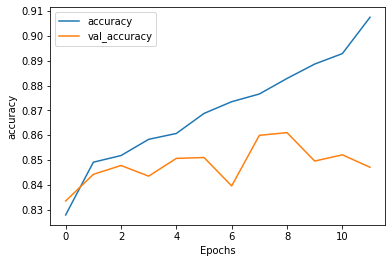

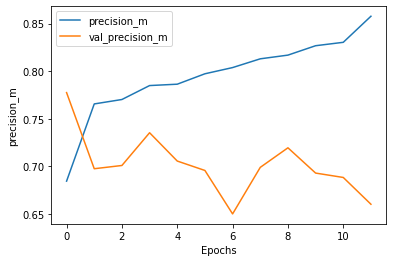

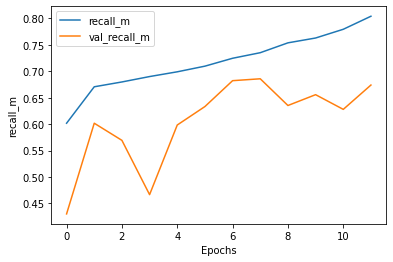

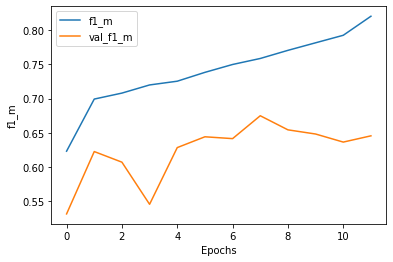

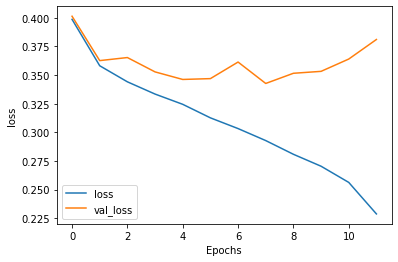

In [68]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_callback, "accuracy")
plot_graphs(history_callback, "precision_m")
plot_graphs(history_callback, "recall_m")
plot_graphs(history_callback, "f1_m")
plot_graphs(history_callback, "loss")

In [66]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

y_pred = rnn_model.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# print(y_pred)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
prec = precision_score(y_test, y_pred, average='macro')

print("Acc: ", acc)
print("F1: ", f1)
print("recall: ", rec)
print("precision: ", prec)

Acc:  0.86
F1:  0.811891939322811
recall:  0.8075385656100249
precision:  0.8166281793760537
